In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as kmeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import seaborn as sns
import math
import os

excelpath = 'excel_gaming_data'
#gamedf = pd.read_excel(excelpath + '/Tax10-11.xls')
ddict = {} # Created A dataframe dictionary to modify each dictionary iteratively
for filename in os.listdir(excelpath): # Iterates through each excel file
    f = os.path.join(excelpath, filename)
    # checking if it is a file
    if os.path.isfile(f) & ~filename.startswith('.'):
        ddict[filename[-6:-4]] = pd.read_excel(excelpath + '/' + filename) # sets the value of each dictionary
        
        for idx, val in enumerate(ddict[filename[-6:-4]].iloc[0,:]): # Iterates through each column of the excel spread sheet in question
            if idx > 1:
                if idx > 7:
                    ddict[filename[-6:-4]].columns.values[idx] = ddict[filename[-6:-4]].iloc[0,idx] + ' 20' + str(filename[-6:-4]) # Changes the column name using the next year and the month. The next year is used if past December, which corresponds to an index of 7, ad
                else:
                    ddict[filename[-6:-4]].columns.values[idx] = ddict[filename[-6:-4]].iloc[0,idx] + ' 20' + str(filename[-9:-7]) # Changes the column name using the first year specified and the month
        if filename[-6:-4] != '11': # Removes the first 2 columns of the excel spread sheet, except if it is the starting year spread sheet
            ddict[filename[-6:-4]] = ddict[filename[-6:-4]].drop(columns=ddict[filename[-6:-4]].columns[0])
            ddict[filename[-6:-4]] = ddict[filename[-6:-4]].drop(columns=ddict[filename[-6:-4]].columns[0])
            
gamedf = ddict['11'] # initializes the dataframe for our game data
for ind in range(12,22): # Concatenates all dictionary values into one pandas dataframe
    gamedf = pd.concat([gamedf,ddict[str(ind)]],axis=1)

# Changed some column names:
gamedf.columns.values[0] = 'Location' 
gamedf.columns.values[1] = 'Attributes'
gamedf = gamedf.drop(0) # Removes the first row 
gamedf = gamedf.iloc[0:429,:] # We had extra noisy data, which I just removed, since it did not correspond to a date.
# I don't know why this is, hopefully it didn't correspond to other data, but I didn't see any missing data.
gamedf_T=gamedf.T
gamedf_T.columns = gamedf_T.iloc[1]
gamedf_T=gamedf_T.drop(gamedf_T.index[[1]])


colval = gamedf_T.columns[0] # The first column header device

# Renamed the column headers so each attribute is unique to a device. This will allow us to reference these headers.
for ind in range(1,len(gamedf_T.columns)):
    if pd.isna(gamedf_T.columns[ind - 1]):
        colval = gamedf_T.columns[ind]

    if (not pd.isna(gamedf_T.columns[ind - 1])) and (not pd.isna(gamedf_T.columns[ind])):
        gamedf_T.columns.values[ind] = str(colval) + ' ' + str(gamedf_T.columns[ind])

for ind in range(1,len(gamedf_T.columns)):
    if pd.isna(gamedf_T.columns[ind]):
        gamedf_T.columns.values[ind] = 'trash'

gamedf_T.drop(['trash'], axis = 1, inplace = True)
gamedf_T.drop(['Location'], inplace = True)

# Filled in missing values using the mean of the corresponding column
for indx in range(0,len(gamedf_T.index)):
    for indy in range(1,len(gamedf_T.columns)):
        if pd.isna(gamedf_T.iloc[indx,indy]):
            colmean = gamedf_T.iloc[:,indy].mean()
            gamedf_T.iloc[indx,indy] = colmean
        
gamedf_T.to_csv('gamedf_T.csv')
#gamedf_T.drop(gamedf_T.columns.values[drcols], axis = 1, inplace = True)


# Created four datasets, one for each location. I might improve this later, but for now, this should suffice.
stateval = 26*3 + 10
crippleval = 26*6 + 19
blackval = 26*10 + 2
centralval = 26*13 + 10
state = gamedf_T.iloc[:,0:stateval-1]#.drop(['Location'])
cripple = gamedf_T.iloc[:,stateval-1:crippleval-1]#.drop(['Location'])
black = gamedf_T.iloc[:,crippleval-1:blackval-1]#.drop(['Location'])
central = gamedf_T.iloc[:,blackval-1:centralval-1]#.drop(['Location'])

# Prints the last 5 elements of each locations data
#print(state.iloc[0,-5:])
#print(cripple.iloc[0,-5:])
#print(black.iloc[0,-5:])
#print(cripple.iloc[0,-5:])

#resets the index so we can work this the month year column
state.reset_index(inplace=True)
state[['month','year']] = state.iloc[:,0].str.split(expand=True)
print(state.head(20))
state.to_csv('state.csv')

cripple.reset_index(inplace=True)
cripple[['month','year']] = cripple.iloc[:,0].str.split(expand=True)
#print(cripple.columns)

black.reset_index(inplace=True)
black[['month','year']] = black.iloc[:,0].str.split(expand=True)
#print(black.columns)

central.reset_index(inplace=True)
central[['month','year']] = central.iloc[:,0].str.split(expand=True)
#print(central.columns)

#create a df containing only the yearly total values
state_totals= state[state.month.isin(['TOTAL'])]
#print(state_totals.head(20))

cripple_totals= cripple[cripple.month.isin(['TOTAL'])]
#print(cripple_totals.head(20))

black_totals= black[black.month.isin(['TOTAL'])]
#print(black_totals.head(20))

central_totals= central[central.month.isin(['TOTAL'])]
#print(central_totals.head(20))


Attributes           index Slots Total Slots Total Coins In Slots Total AGP  \
0                JULY 2010       15224         924881940.34     63485300.52   
1              AUGUST 2010       15182         900224418.95      60548129.6   
2           SEPTEMBER 2010       15189         859887596.89     59638919.56   
3             OCTOBER 2010       15067         859014005.02     58207468.91   
4            NOVEMBER 2010       14572         745499907.07     50949581.25   
5            DECEMBER 2010       14194         740211154.54      51507997.2   
6             JANUARY 2011       14367         781224517.61     53065324.29   
7            FEBRUARY 2011       14303         738530651.44     51589059.54   
8               MARCH 2011       14081         851830451.35     59112001.56   
9               APRIL 2011       14071         826837715.67     57182308.32   
10                MAY 2011       14082         848486244.76     58930584.95   
11               JUNE 2011       14116         78768

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


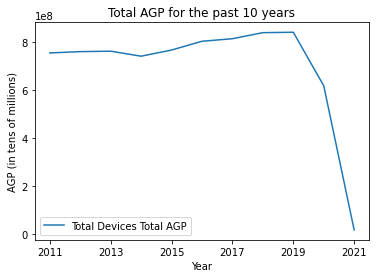

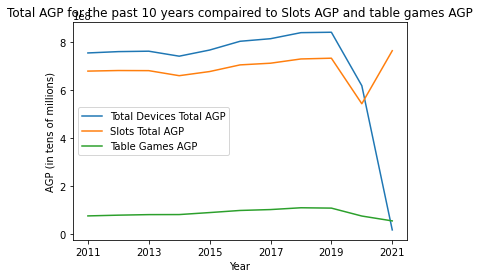

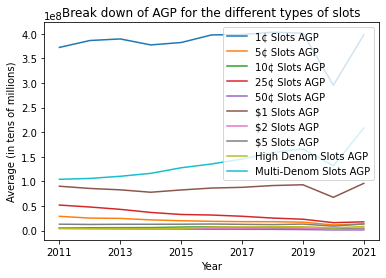

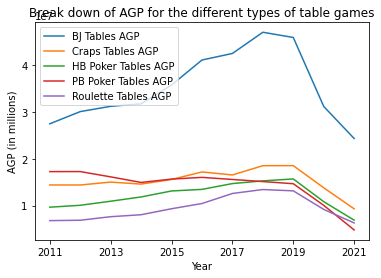

In [14]:
#plot 1
ax = plt.gca()

state_totals.plot(kind='line',x='year',y='Total Devices Total AGP',ax=ax)

plt.title("Total AGP for the past 10 years")
plt.xlabel("Year")
plt.ylabel("AGP (in tens of millions)")
plt.show()


#plot 2
ax = plt.gca()

state_totals.plot(kind='line',x='year',y='Total Devices Total AGP',ax=ax)
state_totals.plot(kind='line',x='year',y='Slots Total AGP',ax=ax)
state_totals.plot(kind='line',x='year',y='Table Games AGP',ax=ax)



plt.title("Total AGP for the past 10 years compaired to Slots AGP and table games AGP")
plt.xlabel("Year")
plt.ylabel("AGP (in tens of millions)")
plt.show()


#plot 3
ax = plt.gca()

state_totals.plot(kind='line',x='year',y='1¢ Slots AGP',ax=ax)
state_totals.plot(kind='line',x='year',y='5¢ Slots AGP',ax=ax)
state_totals.plot(kind='line',x='year',y='10¢ Slots AGP',ax=ax)
state_totals.plot(kind='line',x='year',y='25¢ Slots AGP',ax=ax)
state_totals.plot(kind='line',x='year',y='50¢ Slots AGP',ax=ax)
state_totals.plot(kind='line',x='year',y='$1 Slots AGP',ax=ax)
state_totals.plot(kind='line',x='year',y='$2 Slots AGP',ax=ax)
state_totals.plot(kind='line',x='year',y='$5 Slots AGP',ax=ax)
state_totals.plot(kind='line',x='year',y='High Denom Slots AGP',ax=ax)
state_totals.plot(kind='line',x='year',y='Multi-Denom Slots AGP',ax=ax)
#state.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.title("Break down of AGP for the different types of slots")
plt.xlabel("Year")
plt.ylabel("Average (in tens of millions)")
plt.show()

#plot 4
ax = plt.gca()

state_totals.plot(kind='line',x='year',y='BJ Tables AGP',ax=ax)
state_totals.plot(kind='line',x='year',y='Craps Tables AGP',ax=ax)
state_totals.plot(kind='line',x='year',y='HB Poker Tables AGP',ax=ax)
state_totals.plot(kind='line',x='year',y='PB Poker Tables AGP',ax=ax)
state_totals.plot(kind='line',x='year',y='Roulette Tables AGP',ax=ax)
#state.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.title("Break down of AGP for the different types of table games")
plt.xlabel("Year")
plt.ylabel("AGP (in millions)")
plt.show()


state_totals.to_csv('state_totals.csv')
colors = ['r','g','b']
#plt.scatter(state.iloc[:,0],np.zeros(len(state.iloc[:,0])), color='r')
#plt.scatter(cripple.iloc[:,0],np.zeros(len(cripple.iloc[:,0])), color='g')
#plt.scatter(black.iloc[:,0],np.zeros(len(black.iloc[:,0])), color='b')

Text(0.5, 1.0, 'AGP vs. Coins In for all Slot Machines')

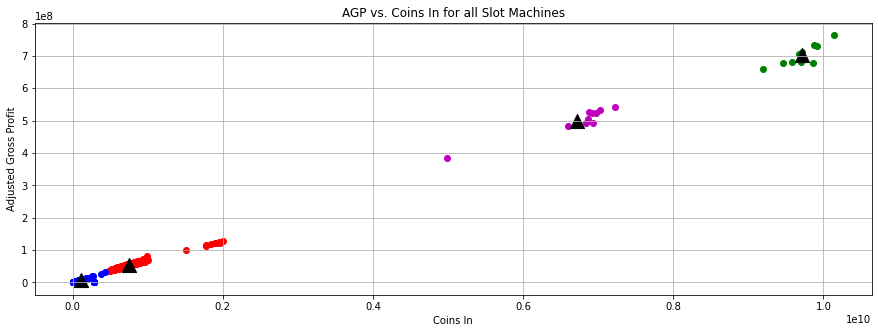

In [106]:
slotcoin = pd.concat([state.loc[:,'Slots Total Coins In'],cripple.loc[:,'Slots Total Coins In'],black.loc[:,'Slots Total Coins In'],central.loc[:,'Slots Total Coins In']],axis=0)
slotagp = pd.concat([state.loc[:,'Slots Total AGP'],cripple.loc[:,'Slots Total AGP'],black.loc[:,'Slots Total AGP'],central.loc[:,'Slots Total AGP']],axis=0)
plt.rcParams['figure.figsize'] = [15,5]
'''
plt.scatter(state.loc[:,'Slots Total Coins In'],state.loc[:,'Slots Total AGP'],color='r')
plt.scatter(cripple.loc[:,'Slots Total Coins In'],cripple.loc[:,'Slots Total AGP'],color='g')
plt.scatter(black.loc[:,'Slots Total Coins In'],black.loc[:,'Slots Total AGP'],color='b')
plt.scatter(central.loc[:,'Slots Total Coins In'],central.loc[:,'Slots Total AGP'],color='y')
'''
slotagp = slotagp.to_numpy()
slotcoin = slotcoin.to_numpy()
points = np.vstack((slotcoin,slotagp)).T
kmeansmodel = kmeans(n_clusters=4)
values = kmeansmodel.fit_predict(points)
centind0 = np.where(values[:] == 0)[0]
centind1 = np.where(values[:] == 1)[0]
centind2 = np.where(values[:] == 2)[0]
centind3 = np.where(values[:] == 3)[0]
centroids = kmeansmodel.cluster_centers_

ax = plt.gca()
plt.grid()
plt.scatter(slotcoin[centind0],slotagp[centind0],color='r')
plt.scatter(slotcoin[centind1],slotagp[centind1],color='g')
plt.scatter(slotcoin[centind2],slotagp[centind2],color='b')
plt.scatter(slotcoin[centind3],slotagp[centind3],color='m')
plt.scatter(centroids[:,0],centroids[:,1],color='k', marker='^', s = 200)
plt.xlabel('Coins In')
plt.ylabel('Adjusted Gross Profit')
plt.title('AGP vs. Coins In for all Slot Machines')

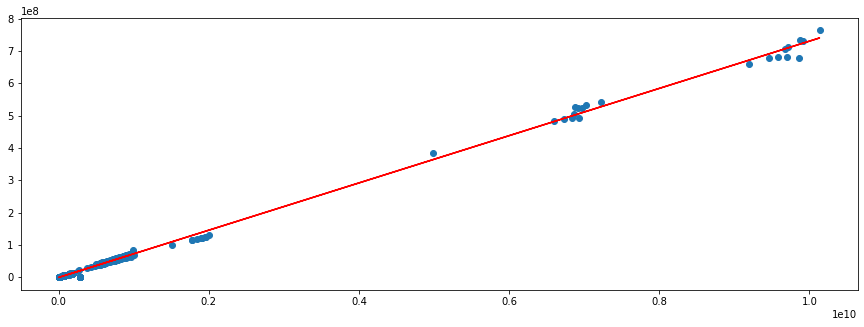

In [120]:
xdata = slotcoin.reshape(-1,1)
ydata = slotagp.reshape(-1,1)
xdata_train, xdata_test, ydata_train, ydata_test = train_test_split(xdata, ydata, test_size=0.2)
linreg = LinearRegression()
linreg.fit(xdata_train, ydata_train)
ydata_pred = linreg.predict(xdata_test)
inter = linreg.intercept_
slope = linreg.coef_
calcy = xdata*slope + inter
ax = plt.gca()
plt.plot(xdata,calcy,'r')
plt.scatter(slotcoin,slotagp)